In [1]:
import pandas as pd

In [2]:
#데이터 불러오기
poketmon_df = pd.read_csv('datasets_poketmon.csv', encoding='latin1')

In [3]:
poketmon_df.head()

,#,Name,HP,Attack,Defense,Speed,Generation,Legendary
0,1,Bulbasaur,45,49,49,45,1,False
1,2,Ivysaur,60,62,63,60,1,False
2,3,Venusaur,80,82,83,80,1,False
3,3,VenusaurMega Venusaur,80,100,123,80,1,False
4,4,Charmander,39,52,43,65,1,False


In [4]:
poketmon_df.describe()

,#,HP,Attack,Defense,Speed,Generation
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,363.227785,69.287860,79.028786,73.884856,68.300375,3.326658
std,208.144712,25.537377,32.468345,31.179997,29.071468,1.660292
min,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000
25%,185.500000,50.000000,55.000000,50.000000,45.000000,2.000000
50%,365.000000,65.000000,75.000000,70.000000,65.000000,3.000000
75%,539.500000,80.000000,100.000000,90.000000,90.000000,5.000000
max,721.000000,255.000000,190.000000,230.000000,180.000000,6.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

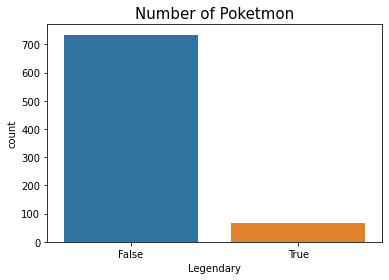

In [6]:
#전설 포켓몬 비율
plt.title('Number of Poketmon', fontsize=15)
sns.countplot(data=poketmon_df, x='Legendary')
plt.show()

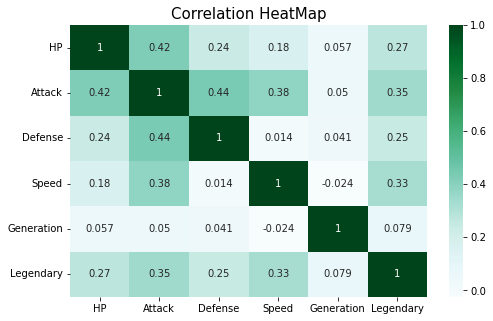

In [52]:
plt.figure(figsize=(8, 5))
plt.title('Correlation HeatMap', fontsize=15)
sns.heatmap(poketmon_df.corr(), annot=True, cmap='BuGn')
plt.show()

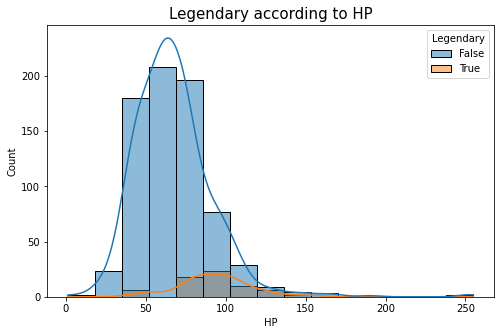

In [7]:
#HP에 따른 전설
plt.figure(figsize=(8, 5))
plt.title('Legendary according to HP', fontsize=15)
sns.histplot(data=poketmon_df, x='HP', kde=True, hue='Legendary', bins=15)
plt.show()

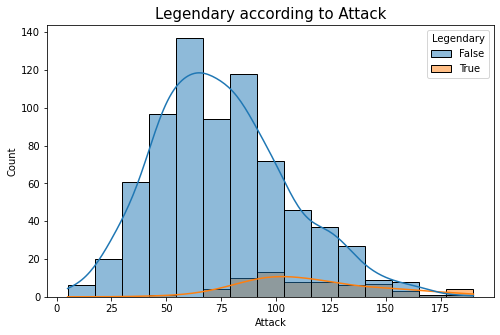

In [8]:
#Attack에 따른 전설
plt.figure(figsize=(8, 5))
plt.title('Legendary according to Attack', fontsize=15)
sns.histplot(data=poketmon_df, x='Attack', kde=True, hue='Legendary', bins=15)
plt.show()

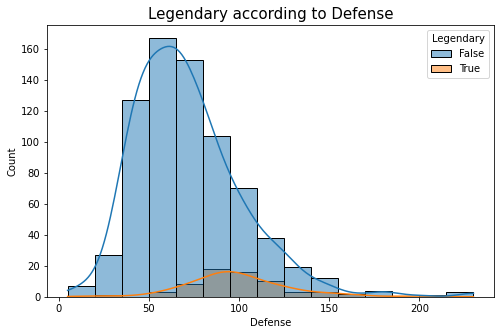

In [9]:
#Defense에 따른 전설
plt.figure(figsize=(8, 5))
plt.title('Legendary according to Defense', fontsize=15)
sns.histplot(data=poketmon_df, x='Defense', kde=True, hue='Legendary', bins=15)
plt.show()

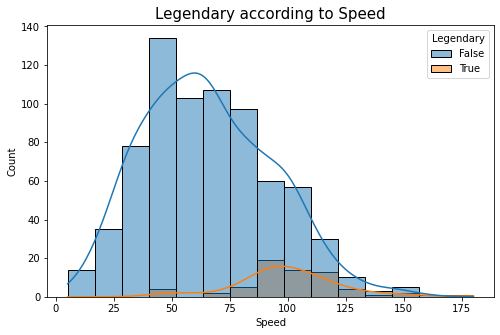

In [10]:
#Speed에 따른 전설
plt.figure(figsize=(8, 5))
plt.title('Legendary according to Speed', fontsize=15)
sns.histplot(data=poketmon_df, x='Speed', kde=True, hue='Legendary', bins=15)
plt.show()

### Preprocessing Step

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
poketmon_df.head(3)

,#,Name,HP,Attack,Defense,Speed,Generation,Legendary
0,1,Bulbasaur,45,49,49,45,1,False
1,2,Ivysaur,60,62,63,60,1,False
2,3,Venusaur,80,82,83,80,1,False


In [13]:
#불필요한 데이터 제거
poketmon_df.drop(columns=['#', 'Name'], inplace=True)

#데이터와 레이블 값 분리
data = poketmon_df.drop(columns=['Legendary'])
label = poketmon_df['Legendary']

In [14]:
data.head(3)

,HP,Attack,Defense,Speed,Generation
0,45,49,49,45,1
1,60,62,63,60,1
2,80,82,83,80,1


In [15]:
#수치형 데이터 전처리
num_data = data.drop(columns=['Generation'])
cat_data = data[['Generation']]

#StandardScaler
scaler = StandardScaler()

num_data_scaled = scaler.fit_transform(num_data)
num_data_scaled = pd.DataFrame(data=num_data_scaled, columns=num_data.columns)
#데이터 프레임 합치기
data = pd.concat([num_data_scaled, cat_data], axis=1)
data.head(3)

,HP,Attack,Defense,Speed,Generation
0,-0.951667,-0.925443,-0.798603,-0.801988,1
1,-0.363925,-0.524802,-0.349316,-0.285695,1
2,0.419732,0.091568,0.292523,0.402696,1


In [16]:
#학습데이터 테스트 데이터 분리
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2
)

In [18]:
#머신러닝 학습
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [19]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
#모델 평가
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [21]:
pred_lr = model_lr.predict(x_test)
print(classification_report(y_test, pred_lr))
print("Logistic Regression의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_lr) * 100))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       151
        True       0.83      0.56      0.67         9

    accuracy                           0.97       160
   macro avg       0.90      0.77      0.83       160
weighted avg       0.97      0.97      0.97       160

Logistic Regression의 정확도는 : 96.88 % 입니다.


In [22]:
#SGD
model_sgd = SGDClassifier()
model_sgd.fit(x_train, y_train)
pred_sgd = model_sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))
print("Stochastic Gradient Descent 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_sgd) * 100))

              precision    recall  f1-score   support

       False       0.99      0.93      0.96       151
        True       0.41      0.78      0.54         9

    accuracy                           0.93       160
   macro avg       0.70      0.86      0.75       160
weighted avg       0.95      0.93      0.94       160

Stochastic Gradient Descent 의 정확도는 : 92.50 % 입니다.


In [23]:
#DecisionTree
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)
pred_dtc = model_dtc.predict(x_test)
print(classification_report(y_test, pred_dtc))
print("Decision Tree 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_dtc) * 100))

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       151
        True       0.21      0.33      0.26         9

    accuracy                           0.89       160
   macro avg       0.59      0.63      0.60       160
weighted avg       0.92      0.89      0.90       160

Decision Tree 의 정확도는 : 89.38 % 입니다.


In [37]:
#RandomForest
model_rfc = RandomForestClassifier(n_estimators=1000)
model_rfc.fit(x_train, y_train)
pred_rfc = model_rfc.predict(x_test)
print(classification_report(y_test, pred_rfc))
print("Random Forest 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_rfc) * 100))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       151
        True       0.80      0.44      0.57         9

    accuracy                           0.96       160
   macro avg       0.88      0.72      0.78       160
weighted avg       0.96      0.96      0.96       160

Random Forest 의 정확도는 : 96.25 % 입니다.


In [25]:
#GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)
pred_gnb = model_gnb.predict(x_test)
print(classification_report(y_test, pred_gnb))
print("Gaussian Naive Bayes 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_gnb) * 100))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       151
        True       0.55      0.67      0.60         9

    accuracy                           0.95       160
   macro avg       0.76      0.82      0.79       160
weighted avg       0.96      0.95      0.95       160

Gaussian Naive Bayes 의 정확도는 : 95.00 % 입니다.


In [26]:
#KNN
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)
print(classification_report(y_test, pred_knn))
print("K-NearestNeighbors 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_knn) * 100))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       151
        True       0.67      0.44      0.53         9

    accuracy                           0.96       160
   macro avg       0.82      0.72      0.76       160
weighted avg       0.95      0.96      0.95       160

K-NearestNeighbors 의 정확도는 : 95.62 % 입니다.


In [27]:
#svm
model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)
pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, pred_svm))
print("Support Vector Machine 의 정확도는 : {:.2f} % 입니다.".format(accuracy_score(y_test, pred_svm) * 100))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       151
        True       1.00      0.44      0.62         9

    accuracy                           0.97       160
   macro avg       0.98      0.72      0.80       160
weighted avg       0.97      0.97      0.96       160

Support Vector Machine 의 정확도는 : 96.88 % 입니다.


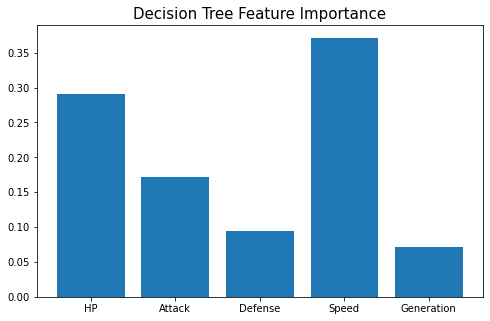

In [28]:
#Decision Tree Feature Importance
plt.figure(figsize=(8, 5))
plt.title('Decision Tree Feature Importance', fontsize=15)
plt.bar(data.columns, model_dtc.feature_importances_)
plt.show()

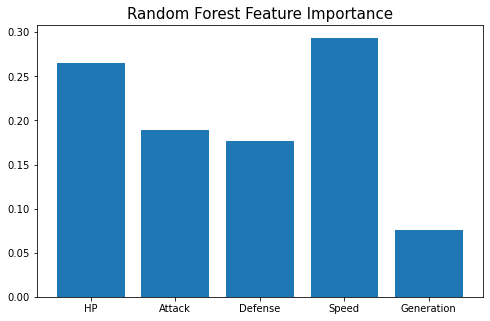

In [29]:
#Random Forest Feature Importance
plt.figure(figsize=(8, 5))
plt.title('Random Forest Feature Importance', fontsize=15)
plt.bar(data.columns, model_rfc.feature_importances_)
plt.show()

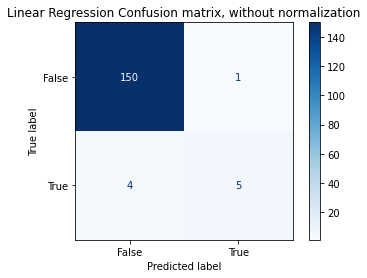

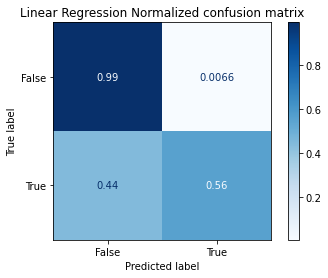

In [38]:
#Confusion Matrix
titles_options = [
    ("Linear Regression Confusion matrix, without normalization", None),
    ("Linear Regression Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_lr,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

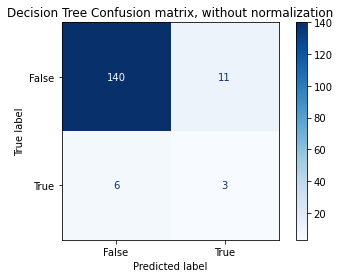

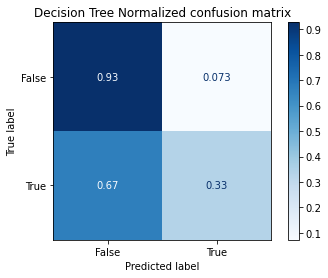

In [31]:
#Confusion Matrix
titles_options = [
    ("Decision Tree Confusion matrix, without normalization", None),
    ("Decision Tree Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_dtc,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

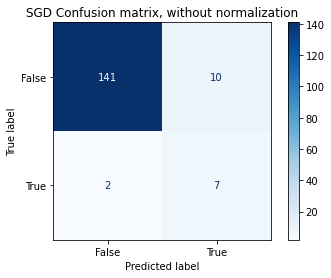

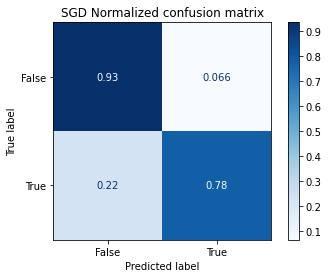

In [32]:
#Confusion Matrix
titles_options = [
    ("SGD Confusion matrix, without normalization", None),
    ("SGD Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_sgd,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

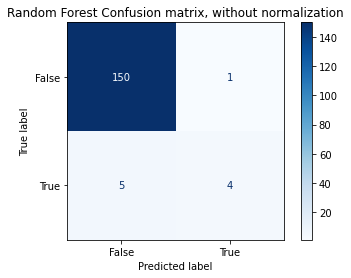

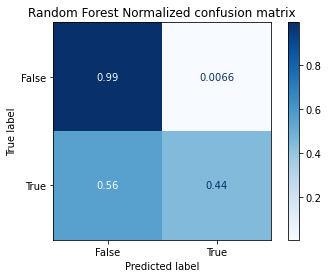

In [39]:
#Confusion Matrix
titles_options = [
    ("Random Forest Confusion matrix, without normalization", None),
    ("Random Forest Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_rfc,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

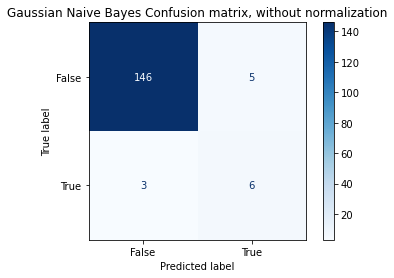

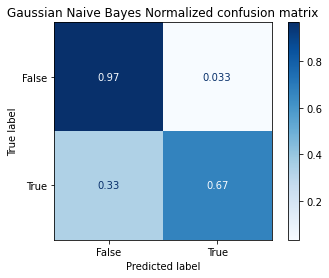

In [40]:
#Confusion Matrix
titles_options = [
    ("Gaussian Naive Bayes Confusion matrix, without normalization", None),
    ("Gaussian Naive Bayes Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_gnb,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

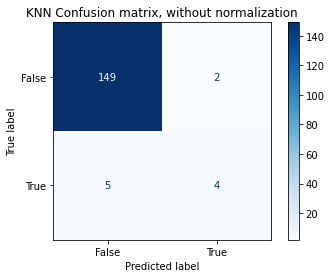

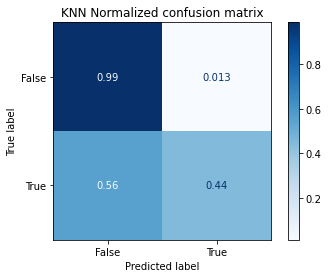

In [41]:
#Confusion Matrix
titles_options = [
    ("KNN Confusion matrix, without normalization", None),
    ("KNN Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_knn,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

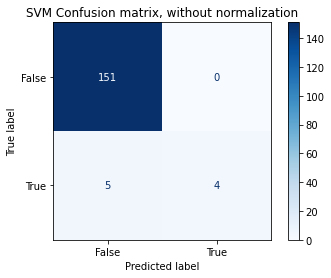

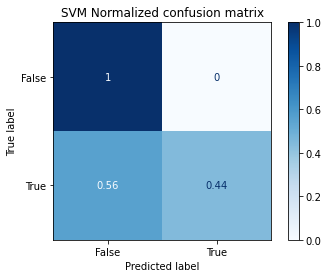

In [42]:
#Confusion Matrix
titles_options = [
    ("SVM Confusion matrix, without normalization", None),
    ("SVM Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svm,
        x_test,
        y_test,
        display_labels=['False', 'True'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()